In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib 

In [119]:
# read in "private_successful_matches.csv"
private = pd.read_csv("private_successful_matches.csv")
private

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,LoGrade,HiGrade,PSS_ADDRESS,PSS_CITY,PSS_COUNTY_NO,PSS_COUNTY_FIPS,PSS_STABB,PSS_STATE_CODE,PSS_ZIP5,PSS_PHONE,DAYS PER SCHOOL YEAR,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_UG,PSS_ENROLL_PK,PSS_ENROLL_K,PSS_ENROLL_T,PSS_RACE_ AMERICAN_INDIAN,PSS_RACE_ASIAN/PACIFIC,PSS_RACE_HISPANIC,PSS_RACE_BLACK,PSS_RACE_WHITE,PSS_RACE_PACIFIC,PSS_RACE_MULTICULTURAL,PSS_FULLTIME_TEACH,PSS_COEDUCATION,PSS_LEVEL,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,PSS_ORIENT,PSS_COUNTY_NAME,Matched Address,Matched School Name
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,14,17,330 BEDFORD PARK BLVD,BRONX,36005,5,NY,36,10458,7183645353,181.0,7.00,Yes,NaN,NaN,NaN,289.0,0.0,15.0,184.0,78.0,8.0,0.0,4.0,18.5,2,2,1,0.00,5.19,63.66,26.98,2.76,0.00,1.38,15.62,1,BRONX,NaN,NaN
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BLVD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,2,13,1305 HYLAN BLVD,STATEN ISLAND,36085,85,NY,36,10305,7183510939,180.0,6.75,No,NaN,14.0,13.0,191.0,2.0,11.0,6.0,7.0,151.0,0.0,0.0,9.5,1,1,1,1.12,6.21,3.38,3.95,85.31,0.00,0.00,18.63,1,RICHMOND,NaN,NaN
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,2,13,2433 OCEAN PKWY,BROOKLYN,36047,47,NY,36,11235,7186486100,160.0,7.50,Yes,NaN,51.0,14.0,176.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,14.4,2,1,2,0.00,0.00,0.00,0.00,100.00,0.00,0.00,8.68,18,KINGS,NaN,NaN
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,2,12,8989 VAN WYCK EXPY,JAMAICA,36081,81,NY,36,11435,7182976522,180.0,6.50,Yes,NaN,32.0,4.0,68.0,0.0,28.0,0.0,1.0,4.0,0.0,3.0,6.1,1,1,2,0.00,77.77,0.00,2.77,11.11,0.00,8.33,5.90,17,QUEENS,NaN,NaN
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BLVD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,2,17,130-08 ROCKAWAY BLVD,SOUTH OZONE PARK,36081,81,NY,36,11420,7183223154,182.0,7.25,Yes,NaN,40.0,35.0,463.0,0.0,329.0,0.0,21.0,73.0,0.0,0.0,38.0,1,3,2,0.00,77.77,0.00,4.96,17.25,0.00,0.00,11.13,17,QUEENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,THE SHIELD INSTITUTE,1800 ANDREWS AVE BSMT,10453.0,40.851283,-73.915951,0,86,NaN,BB101113,SHIELD INSTITUTE OF FLUSHING,2,2,14461 ROOSEVELT AVE,FLUSHING,36081,81,NY,36,11354,7189398700,180.0,6.25,No,46.0,56.0,NaN,102.0,0.0,6.0,22.0,11.0,6.0,0.0,1.0,7.0,1,3,3,0.00,13.04,47.82,23.91,13.04,0.00,2.17,6.57,30,QUEENS,NaN,SHIELD INSTITUTE OF FLUSHING
653,YESHIVA OF KASHO,101 SPENCER ST,11205.0,40.695661,-73.955384,0,86,NaN,A9702490,TALMUD TORAH OF KASHO,2,16,324 PENN ST,BROOKLYN,36047,47,NY,36,11211,7184751177,240.0,10.00,No,NaN,34.0,19.0,328.0,0.0,0.0,0.0,0.0,294.0,0.0,0.0,31.0,3,3,2,0.00,0.00,0.00,0.00,100.00,0.00,0.00,9.48,18,KINGS,NaN,TALMUD TORAH OF KASHO
654,YESHIVAH TIFERES TORAH,27 SKILLMAN ST,11205.0,40.697819,-73.957748,0,86,NaN,A1702684,TALMUD TORAH TIFERES YECHIEL D'ALEKSANDER INC,2,11,3810 14TH AVE,BROOKLYN,36047,47,NY,36,11218,7184347300,NaN,NaN,NaN,NaN,61.0,29.0,258.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,7.0,3,1,2,0.00,0.00,0.00,0.00,100.00,0.00,0.00,28.14,18,KINGS,NaN,TALMUD TORAH TIFERES YECHIEL D'ALEKSANDER INC
655,POLY PREP LOWER SCHOOL FS (PPL),50 PROSPECT PARK WEST,11215.0,40.669228,-73.972993,0,80,NaN,00937803,POLY PREP COUNTRY DAY SCHOOL,2,17,9216 7TH AVE,BROOKLYN,36047,47,NY,36,11228,9176935569,168.0,6.50,Yes,NaN,67.0,39.0,1148.0,1.0,23.0,64.0,146.0,610.0,45.0,192.0,127.9,1,3,3,0.09,2.12,5.92,13.50,56.42,4.16,17.76,8.45,30,KINGS,NaN,POLY PREP COUNTRY DAY SCHOOL


In [121]:
# drop the last two column "Matched Address" and "Matched Name"
private = private.drop(columns = ["Matched Address", "Matched School Name"])
private.head()

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,LoGrade,HiGrade,PSS_ADDRESS,PSS_CITY,PSS_COUNTY_NO,PSS_COUNTY_FIPS,PSS_STABB,PSS_STATE_CODE,PSS_ZIP5,PSS_PHONE,DAYS PER SCHOOL YEAR,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_UG,PSS_ENROLL_PK,PSS_ENROLL_K,PSS_ENROLL_T,PSS_RACE_ AMERICAN_INDIAN,PSS_RACE_ASIAN/PACIFIC,PSS_RACE_HISPANIC,PSS_RACE_BLACK,PSS_RACE_WHITE,PSS_RACE_PACIFIC,PSS_RACE_MULTICULTURAL,PSS_FULLTIME_TEACH,PSS_COEDUCATION,PSS_LEVEL,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,PSS_ORIENT,PSS_COUNTY_NAME
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,14,17,330 BEDFORD PARK BLVD,BRONX,36005,5,NY,36,10458,7183645353,181.0,7.00,Yes,NaN,NaN,NaN,289.0,0.0,15.0,184.0,78.0,8.0,0.0,4.0,18.5,2,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,1,BRONX
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BLVD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,2,13,1305 HYLAN BLVD,STATEN ISLAND,36085,85,NY,36,10305,7183510939,180.0,6.75,No,NaN,14.0,13.0,191.0,2.0,11.0,6.0,7.0,151.0,0.0,0.0,9.5,1,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,1,RICHMOND
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,2,13,2433 OCEAN PKWY,BROOKLYN,36047,47,NY,36,11235,7186486100,160.0,7.50,Yes,NaN,51.0,14.0,176.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,14.4,2,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,18,KINGS
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,2,12,8989 VAN WYCK EXPY,JAMAICA,36081,81,NY,36,11435,7182976522,180.0,6.50,Yes,NaN,32.0,4.0,68.0,0.0,28.0,0.0,1.0,4.0,0.0,3.0,6.1,1,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,17,QUEENS
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BLVD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,2,17,130-08 ROCKAWAY BLVD,SOUTH OZONE PARK,36081,81,NY,36,11420,7183223154,182.0,7.25,Yes,NaN,40.0,35.0,463.0,0.0,329.0,0.0,21.0,73.0,0.0,0.0,38.0,1,3,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,17,QUEENS


In [122]:
# rename the column: "PSS_STUDENT_TEACHER_RATIO" to "Student Teacher Ratio" 
private = private.rename(columns={"PSS_STUDENT_TEACHER_RATIO": "Student Teacher Ratio"})
# add a column "School Type" and set it to "Private"
private["School Type"] = "Private"
# add a column "Jewish" and fill "1" if PSS_ORIENT=18, otherwise "0"
private["Jewish"] = np.where(private["PSS_ORIENT"] == 18, 1, 0)
# add a column "Catholic" and fill "1" if PSS_RELIG=1, otherwise "0"
private["Catholic"] = np.where(private["PSS_RELIG"] == 1, 1, 0)
# add a column "Religious" and fill "0" if PSS_RELIG=3, otherwise "1"
private["Religious"] = np.where(private["PSS_RELIG"] == 3, 0, 1)

In [123]:
# rename column "PSS_ENROLL_T" to "Students"
private = private.rename(columns={"PSS_ENROLL_T": "Students"})

In [124]:
# display all columns
pd.set_option('display.max_columns', None)
private.head()

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,LoGrade,HiGrade,PSS_ADDRESS,PSS_CITY,PSS_COUNTY_NO,PSS_COUNTY_FIPS,PSS_STABB,PSS_STATE_CODE,PSS_ZIP5,PSS_PHONE,DAYS PER SCHOOL YEAR,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_UG,PSS_ENROLL_PK,PSS_ENROLL_K,Students,PSS_RACE_ AMERICAN_INDIAN,PSS_RACE_ASIAN/PACIFIC,PSS_RACE_HISPANIC,PSS_RACE_BLACK,PSS_RACE_WHITE,PSS_RACE_PACIFIC,PSS_RACE_MULTICULTURAL,PSS_FULLTIME_TEACH,PSS_COEDUCATION,PSS_LEVEL,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,Student Teacher Ratio,PSS_ORIENT,PSS_COUNTY_NAME,School Type,Jewish,Catholic,Religious
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,14,17,330 BEDFORD PARK BLVD,BRONX,36005,5,NY,36,10458,7183645353,181.0,7.00,Yes,NaN,NaN,NaN,289.0,0.0,15.0,184.0,78.0,8.0,0.0,4.0,18.5,2,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,1,BRONX,Private,0,1,1
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BLVD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,2,13,1305 HYLAN BLVD,STATEN ISLAND,36085,85,NY,36,10305,7183510939,180.0,6.75,No,NaN,14.0,13.0,191.0,2.0,11.0,6.0,7.0,151.0,0.0,0.0,9.5,1,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,1,RICHMOND,Private,0,1,1
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,2,13,2433 OCEAN PKWY,BROOKLYN,36047,47,NY,36,11235,7186486100,160.0,7.50,Yes,NaN,51.0,14.0,176.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,14.4,2,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,18,KINGS,Private,1,0,1
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,2,12,8989 VAN WYCK EXPY,JAMAICA,36081,81,NY,36,11435,7182976522,180.0,6.50,Yes,NaN,32.0,4.0,68.0,0.0,28.0,0.0,1.0,4.0,0.0,3.0,6.1,1,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,17,QUEENS,Private,0,0,1
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BLVD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,2,17,130-08 ROCKAWAY BLVD,SOUTH OZONE PARK,36081,81,NY,36,11420,7183223154,182.0,7.25,Yes,NaN,40.0,35.0,463.0,0.0,329.0,0.0,21.0,73.0,0.0,0.0,38.0,1,3,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,17,QUEENS,Private,0,0,1


In [125]:
# read in "public_school_matches.csv"
public = pd.read_csv("public_school_matches.csv")
# display all columns
pd.set_option('display.max_columns', None)
public

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched School,Matched Score,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade,High Grade,School Name,District,County Name,Street Address,City,State,ZIP,ZIP 4-digit,Phone,Locale Code,Locale,Charter,Students,Teachers,Student Teacher Ratio,Free Lunch,Reduced Lunch,Directly Certified,Type,Status
0,"4- P.S. 041 FRANCIS WHITE, FIRST STEP NYC @ PS...",411 THATFORD AVENUE BROOKLYN,11212.0,40.660298,-73.907355,0,411 THATFORD AVENUE,95,360012105724,NY-332300010000-332300010522,3600121,NY-332300010000,06,08,MOTT HALL IV,NEW YORK CITY GEOGRAPHIC DISTRICT #23,Kings County,411 THATFORD AVENUE,BROOKLYN,NY,11212,NaN,(929)305-4400,11,City: Large,No,128.0,14.11000,9.0700000,124.00000,2.00000,–,Regular,Open
1,"4- P.S. 041 FRANCIS WHITE, FIRST STEP NYC @ PS...",411 THATFORD AVENUE BROOKLYN,11212.0,40.660298,-73.907355,0,411 THATFORD AVENUE,95,360012102182,NY-332300010000-332300010041,3600121,NY-332300010000,KG,05,PS 41 FRANCIS WHITE,NEW YORK CITY GEOGRAPHIC DISTRICT #23,Kings County,411 THATFORD AVENUE,BROOKLYN,NY,11212,5898.0,(718)495-7732,11,City: Large,No,154.0,16.44000,9.3700000,148.00000,1.00000,–,Regular,Open
2,7ERING AND TECHNOLOGY ACADEMY. BRONX SCHOOL OF...,99 TERRACE VIEW AVENUE BRONX,10463.0,40.877099,-73.912255,2,99 TERRACE VIEW AVENUE,95,360008705676,NY-321000010000-321000011213,3600087,NY-321000010000,09,12,BRONX ENGINEERING AND TECHNOLOGY ACADEMY,NEW YORK CITY GEOGRAPHIC DISTRICT #10,Bronx County,99 TERRACE VIEW AVENUE,BRONX,NY,10463,NaN,(718)563-6678,11,City: Large,No,355.0,35.42000,10.0200000,325.00000,7.00000,–,Regular,Open
3,7ERING AND TECHNOLOGY ACADEMY. BRONX SCHOOL OF...,99 TERRACE VIEW AVENUE BRONX,10463.0,40.877099,-73.912255,2,99 TERRACE VIEW AVENUE,95,360008705678,NY-321000010000-321000011284,3600087,NY-321000010000,09,12,BRONX SCHOOL OF LAW AND FINANCE,NEW YORK CITY GEOGRAPHIC DISTRICT #10,Bronx County,99 TERRACE VIEW AVENUE,BRONX,NY,10463,NaN,(718)561-0113,11,City: Large,No,348.0,25.94000,13.4200000,309.00000,1.00000,–,Regular,Open
4,7ERING AND TECHNOLOGY ACADEMY. BRONX SCHOOL OF...,99 TERRACE VIEW AVENUE BRONX,10463.0,40.877099,-73.912255,2,99 TERRACE VIEW AVENUE,95,360008705496,NY-321000010000-321000011546,3600087,NY-321000010000,09,12,BRONX THEATRE HIGH SCHOOL,NEW YORK CITY GEOGRAPHIC DISTRICT #10,Bronx County,99 TERRACE VIEW AVENUE,BRONX,NY,10463,NaN,(718)329-2902,11,City: Large,No,276.0,26.15000,10.5500000,247.00000,2.00000,–,Regular,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,"PRE-K CENTER @ 500 19TH ST BROOKLYN, MS 442 CA...",500 19 STREET BROOKLYN,11215.0,40.656936,-73.983115,2,MS 442 CARROLL GARDENS SCHOOL FOR INNOVATION,90,360009205502,NY-331500010000-331500010442,3600092,NY-331500010000,06,08,MS 442 CARROLL GARDENS SCHOOL FOR INNOVATION,NEW YORK CITY GEOGRAPHIC DISTRICT #15,Kings County,500 19TH STREET,BROOKLYN,NY,11215,NaN,(718)369-4480,11,City: Large,No,344.0,38.56000,8.9200000,135.00000,11.00000,–,Regular,Open
1376,RALPH R MCKEE CAREER AND TECHNICAL EDUCATION H...,290 SAINT MARKS PLACE STATEN ISLAND,10301.0,40.642786,-74.078730,2,RALPH R MCKEE CAREER AND TECHNICAL EDUCATION H...,90,360010302861,NY-353100010000-353100011600,3600103,NY-353100010000,09,12,RALPH R MCKEE CAREER AND TECHNICAL EDUCATION H...,NEW YORK CITY GEOGRAPHIC DISTRICT #31,Richmond County,101 BELMONT PL,STATEN ISLAND,NY,10301,1855.0,(718)420-2600,11,City: Large,No,741.0,71.73000,10.3300000,564.00000,21.00000,–,Vocational,Open
1377,"ROBERT E PEARY SCHOOL, PS 223 LYNDON B JOHNSON",12520 SUTPHIN BOULEVARD QUEENS,11434.0,40.674533,-73.789416,0,PS 223 LYNDON B JOHNSON,90,360012302728,NY-342700010000-342700010223,3600123,NY-342700010000,PK,05,PS 223 LYNDON B JOHNSON,NEW YORK CITY GEOGRAPHIC DISTRICT #27,Queens County,125-20 SUTPHIN BLVD,JAMAICA,NY,11436,NaN,(718)558-2900,11,City: Large,No,461.0,31.96000,14.4200000,391.00000,8.00000,–,Regular,Open
1378,"

In [126]:
# add a column "School Type" and fill it with "Public"
# add a column  "Jewish" and fill "0" 
# add a column  "Catholic" and fill "0"
# add a column "Religious" and fill "0"
public["School Type"] = "Public"
public["Jewish"] = 0
public["Catholic"] = 0
public["Religious"] = 0

In [127]:
# combine the two dataframes as "all_schools" 
# only keep the columns they share in common: SchoolName, School Type, Jewish, Catholic, Religious, Student Teacher Ratio, Students
all_schools = pd.concat([private, public], ignore_index=True)
all_schools = all_schools[["SchoolName", "COUNTA of Level", "School Type", "Jewish", "Catholic", "Religious", "Student Teacher Ratio", "Students"]]
all_schools

,SchoolName,COUNTA of Level,School Type,Jewish,Catholic,Religious,Student Teacher Ratio,Students
0,ACADEMY OF MOUNT SAINT URSULA,0,Private,0,1,1,15.62,289.0
1,ACADEMY OF ST. DOROTHY,3,Private,0,1,1,18.63,191.0
2,AHI EZER YESHIVA,4,Private,1,0,1,8.68,176.0
3,AL IMAN SCHOOL,7,Private,0,0,1,5.9,68.0
4,AL-IHSAN ACADEMY,1,Private,0,0,1,11.13,463.0
...,...,...,...,...,...,...,...,...
2032,"PRE-K CENTER @ 500 19TH ST BROOKLYN, MS 442 CA...",2,Public,0,0,0,8.9200000,344.0
2033,RALPH R MCKEE CAREER AND TECHNICAL EDUCATION H...,2,Public,0,0,0,10.3300000,741.0
2034,"ROBERT E PEARY SCHOOL, PS 223 LYNDON B JOHNSON",0,Public,0,0,0,14.4200000,461.0
2035,"THE RIVERVIEW SCHOOL @ Q290, PS 290",0,Public,0,0,0,14.9800000,732.0


In [128]:
# In "School Type", replace "Private" with "1" and "Public" with "0"
all_schools["School Type"] = all_schools["School Type"].replace({"Private": 1, "Public": 0})
all_schools.head()

,SchoolName,COUNTA of Level,School Type,Jewish,Catholic,Religious,Student Teacher Ratio,Students
0,ACADEMY OF MOUNT SAINT URSULA,0,1,0,1,1,15.62,289.0
1,ACADEMY OF ST. DOROTHY,3,1,0,1,1,18.63,191.0
2,AHI EZER YESHIVA,4,1,1,0,1,8.68,176.0
3,AL IMAN SCHOOL,7,1,0,0,1,5.9,68.0
4,AL-IHSAN ACADEMY,1,1,0,0,1,11.13,463.0


In [129]:
# save to csv as "all_schools.csv"
all_schools.to_csv("all_schools.csv", index=False)

## Import R

In [130]:
# set up R
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [132]:
%%R

# My commonly used R imports

require('tidyverse')

## Start analyzing

In [133]:
%%R
# Read in the datafram all_schools
all_schools <- read.csv("all_schools.csv")
head(all_schools)


                     SchoolName COUNTA.of.Level School.Type Jewish Catholic
1 ACADEMY OF MOUNT SAINT URSULA               0           1      0        1
2        ACADEMY OF ST. DOROTHY               3           1      0        1
3              AHI EZER YESHIVA               4           1      1        0
4                AL IMAN SCHOOL               7           1      0        0
5              AL-IHSAN ACADEMY               1           1      0        0
6             AL-MADINAH SCHOOL               5           1      0        0
  Religious Student.Teacher.Ratio Students
1         1                 15.62      289
2         1                 18.63      191
3         1                  8.68      176
4         1                   5.9       68
5         1                 11.13      463
6         1                 15.24      812


In [134]:
%%R
# conduct a simple anaylsis of the data
summary(all_schools)

  SchoolName        COUNTA.of.Level  School.Type         Jewish      
 Length:2037        Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :1.000   Median :0.0000   Median :0.0000  
                    Mean   :1.512   Mean   :0.3225   Mean   :0.1139  
                    3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:0.0000  
                    Max.   :7.000   Max.   :1.0000   Max.   :1.0000  
                                                                     
    Catholic         Religious      Student.Teacher.Ratio    Students     
 Min.   :0.00000   Min.   :0.0000   Length:2037           Min.   :   7.0  
 1st Qu.:0.00000   1st Qu.:0.0000   Class :character      1st Qu.: 253.0  
 Median :0.00000   Median :0.0000   Mode  :character      Median : 399.0  
 Mean   :0.09966   Mean   :0.2499                         Mean   : 517.5  
 3rd Qu.:0.00000   3rd Qu.:0.0000                         3rd Qu.

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 23 rows containing non-finite outside the scale range
(`stat_density()`). 



此外: 警告訊息：
於 (function (expr, envir = parent.frame(), enclos = if (is.list(envir) || ：
  強制變更過程中產生了 NA


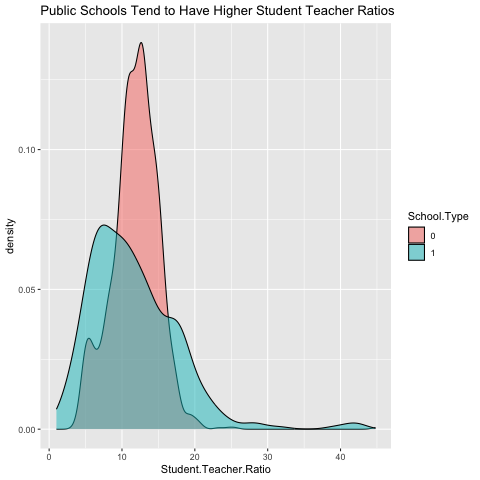

In [135]:
%%R
# plot the distribution of "Student Teacher Ratio" by "School Type"
# fix the parsing error
all_schools$Student.Teacher.Ratio <- as.numeric(as.character(all_schools$Student.Teacher.Ratio))
all_schools$School.Type <- as.factor(all_schools$School.Type)
ggplot(all_schools, aes(x=Student.Teacher.Ratio, fill=School.Type)) + geom_density(alpha=0.5) + ggtitle("Public Schools Tend to Have Higher Student Teacher Ratios")


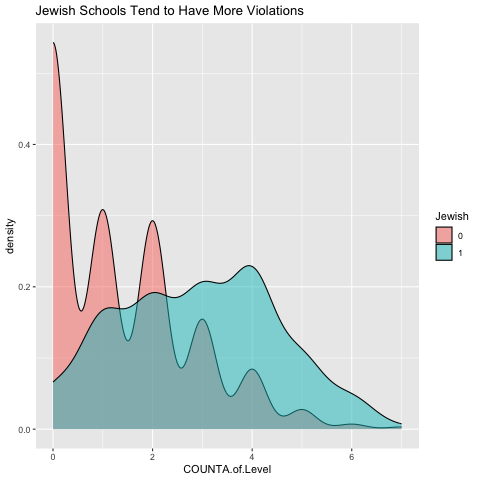

In [136]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Jewish"
# beware that the count of levels is not a continuous variable
# fix the parsing error
all_schools$Jewish <- as.factor(all_schools$Jewish)
ggplot(all_schools, aes(x=COUNTA.of.Level, fill=Jewish)) + geom_density(alpha=0.5) + ggtitle("Jewish Schools Tend to Have More Violations")

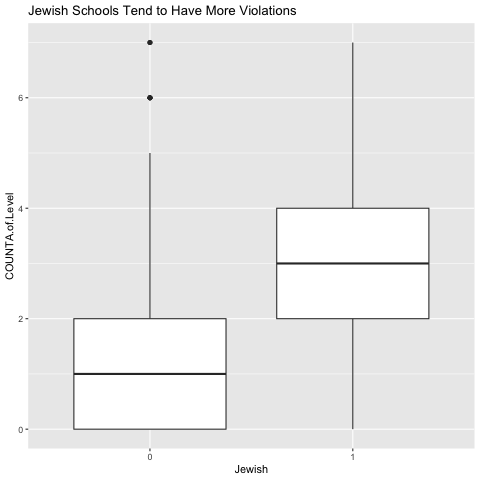

In [137]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Jewish" in box plot
# beware that the count of levels is not a continuous variable
# fix the parsing error
ggplot(all_schools, aes(x=Jewish, y=COUNTA.of.Level)) + geom_boxplot() + ggtitle("Jewish Schools Tend to Have More Violations")

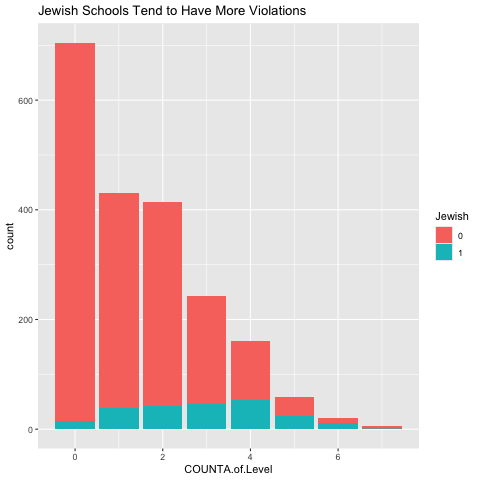

In [138]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Jewish" in bar chart
# beware that the count of levels is not a continuous variable
# fix the parsing error
ggplot(all_schools, aes(x=COUNTA.of.Level, fill=Jewish)) + geom_bar() + ggtitle("Jewish Schools Tend to Have More Violations")

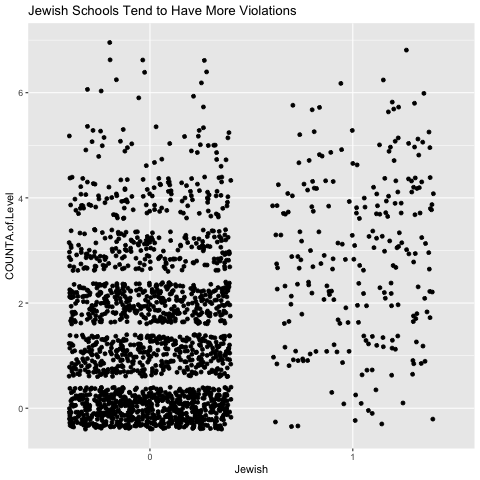

In [139]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Jewish" in geom_jitter
# beware that the count of levels is not a continuous variable
# fix the parsing error
ggplot(all_schools, aes(x=Jewish, y=COUNTA.of.Level)) + geom_jitter() + ggtitle("Jewish Schools Tend to Have More Violations")

In [140]:
%%R
# import to empower beeswarm plots
install.packages("beeswarm")
library(beeswarm)


於啟動期間 - 警告訊息：
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
* installing *source* package ‘beeswarm’ ...
** 成功將 ‘beeswarm’ 程式套件解開並 MD5 和檢查
** using staged installation
** libs
using C compiler: ‘Apple clang version 14.0.3 (clang-1403.0.22.14.1)’
using SDK: ‘MacOSX13.3.sdk’


clang -I"/opt/homebrew/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c beeswarm.c -o beeswarm.o
clang -I"/opt/homebrew/Cellar/r/4.3.2/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c init.c -o init.o
clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -L/opt/homebrew/Cellar/r/4.3.2/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o beeswarm.so beeswarm.o init.o -L/opt/homebrew/Cellar/r/4.3.2/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


installing to /opt/homebrew/lib/R/4.3/site-library/00LOCK-beeswarm/00new/beeswarm/libs
** R
** data
** byte-compile and prepare package for lazy loading


於啟動期間 - 警告訊息：
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
於啟動期間 - 警告訊息：
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location


於啟動期間 - 警告訊息：
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
於啟動期間 - 警告訊息：
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 


** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (beeswarm)


將程式套件安載入 ‘/opt/homebrew/lib/R/4.3/site-library’
(因為 ‘lib’ 沒有被指定)
嘗試 URL 'https://ftp.osuosl.org/pub/cran/src/contrib/beeswarm_0.4.0.tar.gz'
Content type 'application/x-gzip' length 24395 bytes (23 KB)
downloaded 23 KB


下載的程式套件在
	‘/private/var/folders/82/dd5bh8c53fn11t7t8bjlnk700000gn/T/RtmpfbEV0N/downloaded_packages’ 裡


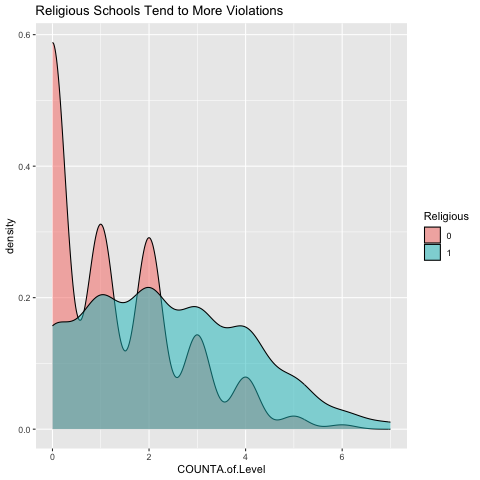

In [141]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Religious"
# beware that the count of levels is not a continuous variable
# fix the parsing error
all_schools$Religious <- as.factor(all_schools$Religious)
ggplot(all_schools, aes(x=COUNTA.of.Level, fill=Religious)) + geom_density(alpha=0.5) + ggtitle("Religious Schools Tend to More Violations")

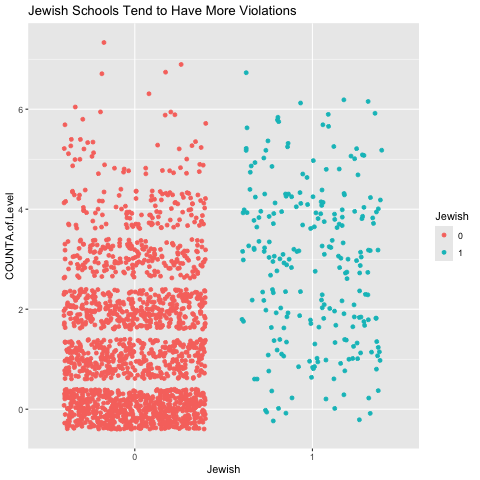

In [142]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Jewish" in dot plot
# beware that the count of levels is not a continuous variable
# fix the parsing error
ggplot(all_schools, aes(x=Jewish, y=COUNTA.of.Level, color=Jewish)) + geom_jitter() + ggtitle("Jewish Schools Tend to Have More Violations")

In [143]:
%%R
# conduct a t-test of "COUNTA.of.Level" on "Religious" = 0 vs "Religious" = 1
# corrected to avoid the parser error
t.test(all_schools$COUNTA.of.Level[all_schools$Religious == 0], all_schools$COUNTA.of.Level[all_schools$Religious == 1])



	Welch Two Sample t-test

data:  all_schools$COUNTA.of.Level[all_schools$Religious == 0] and all_schools$COUNTA.of.Level[all_schools$Religious == 1]
t = -13.538, df = 733.82, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2696676 -0.9480599
sample estimates:
mean of x mean of y 
 1.234948  2.343811 



In [144]:
%%R
# conduct a t-test of "COUNTA.of.Level" on "Jewish" = 0 vs "Jewish" = 1
# corrected to avoid the parser error
t.test(all_schools$COUNTA.of.Level[all_schools$Jewish == 0], all_schools$COUNTA.of.Level[all_schools$Jewish == 1])



	Welch Two Sample t-test

data:  all_schools$COUNTA.of.Level[all_schools$Jewish == 0] and all_schools$COUNTA.of.Level[all_schools$Jewish == 1]
t = -14.234, df = 278.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.778561 -1.346399
sample estimates:
mean of x mean of y 
 1.334072  2.896552 



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: 1: Removed 23 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 23 rows containing missing values or values outside the scale range
(`geom_point()`). 



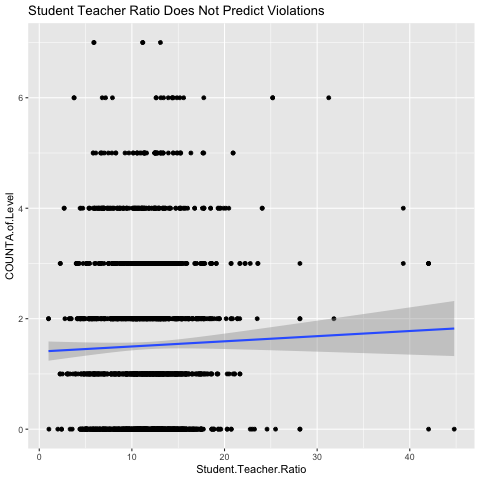

In [145]:
%%R
# conduct a linear regression of "COUNTA.of.Level" on "Student.Teacher.Ratio" 
# beware of invalid syntax
lm(COUNTA.of.Level ~ Student.Teacher.Ratio, data=all_schools)
# and plot the regression line
ggplot(all_schools, aes(x=Student.Teacher.Ratio, y=COUNTA.of.Level)) + geom_point() + geom_smooth(method="lm") + ggtitle("Student Teacher Ratio Does Not Predict Violations")



`geom_smooth()` using formula = 'y ~ x'


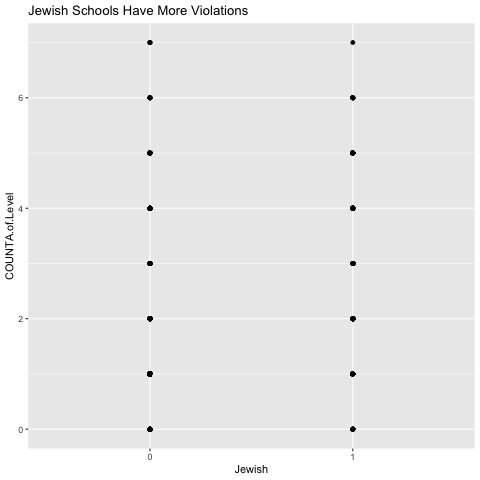

In [146]:
%%R
# conduct a linear regression of "COUNTA.of.Level" on "Jewish"
# beware of invalid syntax
lm(COUNTA.of.Level ~ Jewish, data=all_schools)
# and plot the regression line
ggplot(all_schools, aes(x=Jewish, y=COUNTA.of.Level)) + geom_point() + geom_smooth(method="lm") + ggtitle("Jewish Schools Have More Violations")


## Multivariable Regression

In [147]:
%%R
# make sure "Religious" is a factor and should be treated as a categorical variable, not a string
all_schools$Religious <- as.factor(all_schools$Religious)

In [148]:
%%R
# conduct a multiple regression of "COUNTA of Level" on "Jewish", and "Religious"
# corrected to avoid the parser error
# make sure "Religious" is a factor
all_schools$Religious <- as.factor(all_schools$Religious)
lm(COUNTA.of.Level ~ Jewish + Religious, data=all_schools)



Call:
lm(formula = COUNTA.of.Level ~ Jewish + Religious, data = all_schools)

Coefficients:
(Intercept)      Jewish1   Religious1  
     1.2349       1.0157       0.6459  



In [149]:
%%R
# add "School Type" as a predictor
# corrected to avoid the parser error
model <- lm("COUNTA.of.Level ~ Jewish + Religious + School.Type", data=all_schools)
summary(model)


Call:
lm(formula = "COUNTA.of.Level ~ Jewish + Religious + School.Type", 
    data = all_schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8966 -1.1978 -0.1978  0.8022  5.1191 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.19783

    0.03779  31.693  < 2e-16 ***
Jewish1       1.01569    0.12495   8.128 7.47e-16 ***
Religious1    0.29979    0.14295   2.097  0.03611 *  
School.Type1  0.38325    0.12144   3.156  0.00162 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.404 on 2033 degrees of freedom
Multiple R-squared:  0.1339,	Adjusted R-squared:  0.1326 
F-statistic: 104.7 on 3 and 2033 DF,  p-value: < 2.2e-16



In [150]:
%%R
# add "Students" as a predictor
# corrected to avoid the parser error
model <- lm("COUNTA.of.Level ~ Jewish + Religious + School.Type + Students", data=all_schools)
summary(model)


Call:
lm(formula = "COUNTA.of.Level ~ Jewish + Religious + School.Type + Students", 
    data = all_schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9459 -1.1858 -0.1888  0.8216  5.1421 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.156e+00  5.301e-02  21.800  < 2e-16 ***
Jewish1      1.002e+00  1.255e-01   7.981 2.41e-15 ***
Religious1   2.606e-01  1.442e-01   1.807 0.070946 .  
School.Type1 4.365e-01  1.232e-01   3.544 0.000404 ***
Students     7.670e-05  6.745e-05   1.137 0.255570    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.404 on 2028 degrees of freedom
  (因為不存在，4 個觀察量被刪除了)
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.1332 
F-statistic: 79.07 on 4 and 2028 DF,  p-value: < 2.2e-16



In [151]:
%%R
# add "Student Teacher Ratio" as a predictor
# corrected to avoid the parser error
model <- lm("COUNTA.of.Level ~ Jewish + Religious + School.Type + Students + Student.Teacher.Ratio", data=all_schools)
summary(model)


Call:
lm(formula = "COUNTA.of.Level ~ Jewish + Religious + School.Type + Students + Student.Teacher.Ratio", 
    data = all_schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9620 -1.1859 -0.1904  0.8216  5.1591 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.130e+00  9.748e-02  11.589  < 2e-16 ***
Jewish1               1.002e+00  1.267e-01   7.905 4.37e-15 ***
Religious1            2.432e-01  1.525e-01   1.595  0.11095    
School.Type1          4.477e-01  1.278e-01   3.503  0.00047 ***
Students              6.560e-05  7.032e-05   0.933  0.35102    
Student.Teacher.Ratio 2.694e-03  7.760e-03   0.347  0.72850    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Residual standard error: 1.404 on 2008 degrees of freedom
  (因為不存在，23 個觀察量被刪除了)
Multiple R-squared:  0.1335,	Adjusted R-squared:  0.1313 
F-statistic: 61.87 on 5 and 2008 DF,  p-value: < 2.2e-16



In [152]:
%%R
# add "Catholic" as a predictor
# corrected to avoid the parser error
model <- lm("COUNTA.of.Level ~ Jewish + Religious + School.Type + Students + Student.Teacher.Ratio + Catholic", data=all_schools)
summary(model)


Call:
lm(formula = "COUNTA.of.Level ~ Jewish + Religious + School.Type + Students + Student.Teacher.Ratio + Catholic", 
    data = all_schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9633 -1.1860 -0.1903  0.8216  5.1518 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.128e+00  1.010e-01  11.175  < 2e-16 ***
Jewish1                9.936e-01  1.911e-01   5.201 2.19e-07 ***
Religious1             2.507e-01  2.017e-01   1.243 0.214007    
School.Type1           4.483e-01  1.282e-01   3.496 0.000483 ***
Students               6.557e-05  7.034e-05   0.932 0.351362    
Student.Teacher.Ratio  2.820e-03  8.077e-03   0.349 0.726988    
Catholic              -1.125e-02  1.989e-01  -0.057 0.954901    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.405 on 2007 degrees of freedom
  (因為不存在，23 個觀察量被刪除了)
Multiple R-squared:  0.1335,	Adjusted R-squared:  0.1309 
F-statistic: 51.53 o

In [153]:
%%R
# add "Catholic" as a predictor but not student-teach ratio
# corrected to avoid the parser error
model <- lm("COUNTA.of.Level ~ Jewish + Religious + School.Type + Students + Catholic", data=all_schools)
summary(model)


Call:
lm(formula = "COUNTA.of.Level ~ Jewish + Religious + School.Type + Students + Catholic", 
    data = all_schools)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9458 -1.1859 -0.1889  0.8216  5.1472 

Coefficients:
              Estimate Std. Error t value

 Pr(>|t|)    
(Intercept)  1.156e+00  5.308e-02  21.771  < 2e-16 ***
Jewish1      1.007e+00  1.887e-01   5.336 1.06e-07 ***
Religious1   2.554e-01  2.013e-01   1.269 0.204536    
School.Type1 4.365e-01  1.232e-01   3.542 0.000405 ***
Students     7.653e-05  6.762e-05   1.132 0.257858    
Catholic     7.071e-03  1.911e-01   0.037 0.970483    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.404 on 2027 degrees of freedom
  (因為不存在，4 個觀察量被刪除了)
Multiple R-squared:  0.1349,	Adjusted R-squared:  0.1328 
F-statistic: 63.22 on 5 and 2027 DF,  p-value: < 2.2e-16

